# Blatt 08 
## Noah Scheugenpflug, Salem Rezik, Nikola Mang

## Aufgabe 17

### c) 

Nun gilt es, den Informationsgewinn auch für die anderen Attribute anzeigen zu lassen.

In [1]:
# Libraries we use for data analysis and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# libraries used for the notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

In [2]:
df = pd.read_csv("data.csv", sep = ";") # read data from csv file


In [3]:
df.head()

,Temperatur,Wettervorhersage,Luftfeuchtigkeit,Wind,Fußball
0,29.4,2,85,False,False
1,26.7,2,90,True,False
2,28.3,1,78,False,True
3,21.1,0,96,False,True
4,20.0,0,80,False,True


In [4]:
# sono molto contento
def entropy(p):
    m, counts = np.unique(p, return_counts = True) # possible values
    H = 0
    
    for i in range(len(m)):
        H += counts[i]/len(p) * np.log2(counts[i]/len(p))
    
    return - H

In [5]:
entropy(df["Fußball"]) # to test result of a)

0.9402859586706309

In [6]:
def info_gained(y, x):
    mask = x == True
    n = mask.sum()
    n_ges = len(y)
    n_spec = n_ges - n
    
    
    H_y = entropy(y)
    
    H_yx = n/n_ges * entropy(y[mask]) + n_spec/n_ges * entropy(y[-mask])
    
    IG_yx = H_y - H_yx
    
    return IG_yx

In [7]:
def find_max_cut(y, x):
    states = np.unique(x)
    
    IG_states = np.array([info_gained(y, x > i) for i in states])
    
    plt.figure()
    plt.plot(states[:], IG_states[:], ".")
    
    plt.xlabel(x.name)
    plt.ylabel("Informationsgewinn")
    
    plt.grid()
    
    return IG_states.max()

Maximum Information gained =  0.11340086418110318


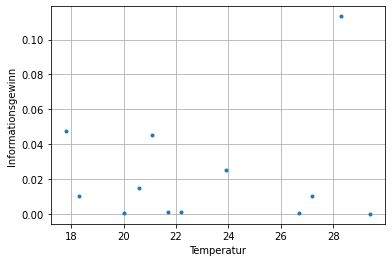

In [8]:
IG_max_T = find_max_cut(df["Fußball"], df["Temperatur"])
print("Maximum Information gained = ", IG_max_T)

Maximum Information gained =  0.10224356360985054


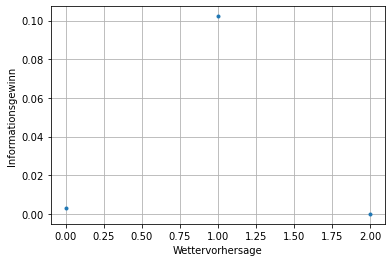

In [9]:
IG_max_WV = find_max_cut(df["Fußball"], df["Wettervorhersage"])
print("Maximum Information gained = ", IG_max_WV)

Maximum Information gained =  0.10224356360985054


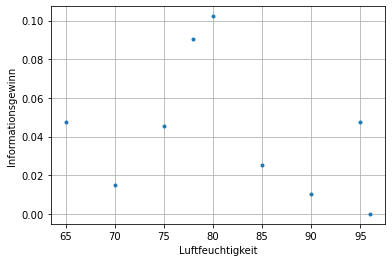

In [10]:
IG_max_L = find_max_cut(df["Fußball"], df["Luftfeuchtigkeit"])
print("Maximum Information gained = ", IG_max_L)

Maximum Information gained =  0.04812703040826927


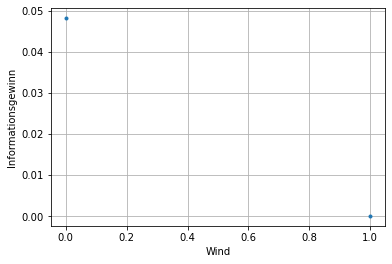

In [12]:
IG_max_W= find_max_cut(df["Fußball"], df["Wind"])
print("Maximum Information gained = ", IG_max_W)

### d)

Es zeigt sich also, dass durch einen cut bei der Temperatur die meiste Information gewonnen werden kann, gleich darauf folgen auf derselben Höhe die Luftfeuchtigkeit und Wettervorhersage.